In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Leemos el dataset y valores perdidos "?"
### Elimino columnas Unnamed y numeros de serie

In [2]:
na_values = ["0"]
#datos = pd.read_csv("X:/Documentos/Formacion/MBIG/ProjectoJamones/cerditos.csv", encoding = "utf-8", na_values= na_values)
datos = pd.read_csv("C:/Users/sanzp/Desktop/ProjectoJamones_v2/Regresion/datos_reformulados_v4.csv", delimiter=',', encoding = "utf-8", na_values= na_values)
pd.options.display.max_columns = None
datos.head(10)
datos.drop(columns=['N_Serie','TipoPesada','NroAnimales','Matadero','Anhada','Ac_Oleico','Ac_Palmitico','Ac_Estearico','Ac_Linoleico'
                    ,'PesoVarios','Pesovientres','PesoCerdos','PesoNetoCanal'], axis=1, inplace=True)
datos

,Articulo,Partida,Raza,Alimentacion,Nacimiento,PesoEntrada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida
0,Paleta,1303,100%_IBERICO,BELLOTA,05/11/2012,66.000,42.90000,PALETA BELLOTA 100% IBRICA,26/08/2014,07/02/2018
1,Jamon,210137,100%_IBERICO,BELLOTA,15/11/2013,18.995,12.34675,JAMON DE BELLOTA 100%_IBERICO,22/07/2014,13/07/2018
2,Jamon,210137,100%_IBERICO,BELLOTA,15/11/2013,18.975,12.33375,JAMON DE BELLOTA 100%_IBERICO,02/08/2015,02/09/2019
3,Jamon,210180,100%_IBERICO,BELLOTA,15/11/2013,18.955,12.32075,JAMON DE BELLOTA 100%_IBERICO,25/07/2015,02/09/2019
4,Jamon,210180,100%_IBERICO,BELLOTA,15/11/2013,18.950,12.31750,JAMON DE BELLOTA 100%_IBERICO,08/01/2015,09/01/2019
...,...,...,...,...,...,...,...,...,...,...
10109,Paleta,210949,100%_IBERICO,BELLOTA,02/09/2018,6.120,3.92500,PALETA BELLOTA 100% IBRICA,23/05/2019,24/12/2021
10110,Paleta,210856,100%_IBERICO,BELLOTA,02/09/2018,6.050,3.92500,PALETA BELLOTA 100% IBRICA,10/08/2019,24/12/2021
10111,Paleta,211291,100%_IBERICO,BELLOTA,30/08/2018,6.000,3.92500,PALETA BELLOTA 100% IBRICA,30/07/2019,24/12/2021
10112,Paleta,210793,100%_IBERICO,BELLOTA,30/08/2018,5.940,3.92500,PALETA BELLOTA 100% IBRICA,25/08/2019,24/12/2021


### Dimensiones de conjunto de Datos

In [3]:
print("Dimension dataset:", (datos.shape))
print()
datos.info()

Dimension dataset: (10114, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Articulo             10114 non-null  object 
 1   Partida              10114 non-null  int64  
 2   Raza                 10114 non-null  object 
 3   Alimentacion         10114 non-null  object 
 4   Nacimiento           8798 non-null   object 
 5   PesoEntrada          10114 non-null  float64
 6   PesoSalida           10114 non-null  float64
 7   DescripcionArticulo  10114 non-null  object 
 8   FechaEntrada         10114 non-null  object 
 9   FechaSalida          10114 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 790.3+ KB


### Reviso valores null


In [4]:
sns.set(rc ={"figure.figsize":(15,8)})

print(datos.isna().sum().sum())
print(datos.isnull().sum().sum())
print(datos.isna().sum())

1316
1316
Articulo                  0
Partida                   0
Raza                      0
Alimentacion              0
Nacimiento             1316
PesoEntrada               0
PesoSalida                0
DescripcionArticulo       0
FechaEntrada              0
FechaSalida               0
dtype: int64


<AxesSubplot:>

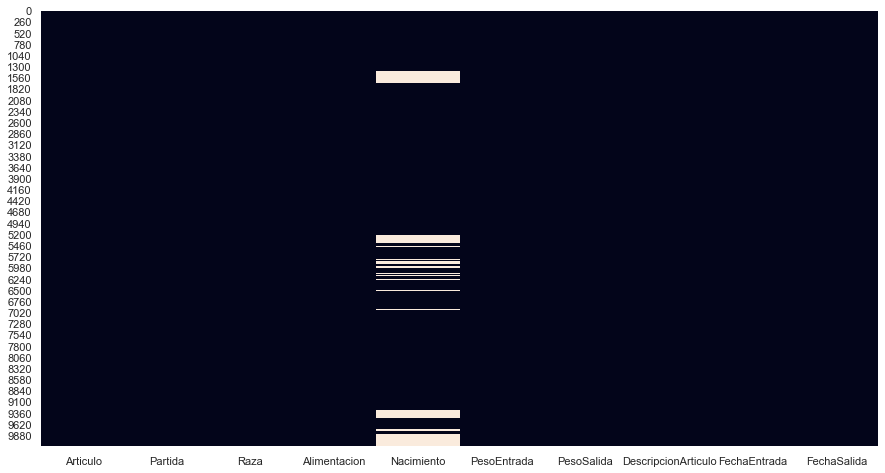

In [5]:
sns.heatmap(datos.isnull(),cbar=False)

# Elimino Fechas dobles y datos faltantes 


In [6]:
datos = datos.drop(datos[datos['Nacimiento'].str.len()>10].index)
datos = datos.drop(datos[datos['Nacimiento'].isna()].index)
datos = datos.drop(datos[datos['PesoSalida'].isna()].index)
#datos = datos.drop(datos[datos['Ac_Oleico'].isna()].index)

In [7]:
datos

,Articulo,Partida,Raza,Alimentacion,Nacimiento,PesoEntrada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida
0,Paleta,1303,100%_IBERICO,BELLOTA,05/11/2012,66.000,42.90000,PALETA BELLOTA 100% IBRICA,26/08/2014,07/02/2018
1,Jamon,210137,100%_IBERICO,BELLOTA,15/11/2013,18.995,12.34675,JAMON DE BELLOTA 100%_IBERICO,22/07/2014,13/07/2018
2,Jamon,210137,100%_IBERICO,BELLOTA,15/11/2013,18.975,12.33375,JAMON DE BELLOTA 100%_IBERICO,02/08/2015,02/09/2019
3,Jamon,210180,100%_IBERICO,BELLOTA,15/11/2013,18.955,12.32075,JAMON DE BELLOTA 100%_IBERICO,25/07/2015,02/09/2019
4,Jamon,210180,100%_IBERICO,BELLOTA,15/11/2013,18.950,12.31750,JAMON DE BELLOTA 100%_IBERICO,08/01/2015,09/01/2019
...,...,...,...,...,...,...,...,...,...,...
10109,Paleta,210949,100%_IBERICO,BELLOTA,02/09/2018,6.120,3.92500,PALETA BELLOTA 100% IBRICA,23/05/2019,24/12/2021
10110,Paleta,210856,100%_IBERICO,BELLOTA,02/09/2018,6.050,3.92500,PALETA BELLOTA 100% IBRICA,10/08/2019,24/12/2021
10111,Paleta,211291,100%_IBERICO,BELLOTA,30/08/2018,6.000,3.92500,PALETA BELLOTA 100% IBRICA,30/07/2019,24/12/2021
10112,Paleta,210793,100%_IBERICO,BELLOTA,30/08/2018,5.940,3.92500,PALETA BELLOTA 100% IBRICA,25/08/2019,24/12/2021


In [8]:
datos.shape

(8213, 10)

In [9]:
sns.set(rc ={"figure.figsize":(15,8)})

print(datos.isna().sum().sum())
print(datos.isnull().sum().sum())
print(datos.isna().sum())

0
0
Articulo               0
Partida                0
Raza                   0
Alimentacion           0
Nacimiento             0
PesoEntrada            0
PesoSalida             0
DescripcionArticulo    0
FechaEntrada           0
FechaSalida            0
dtype: int64


<AxesSubplot:>

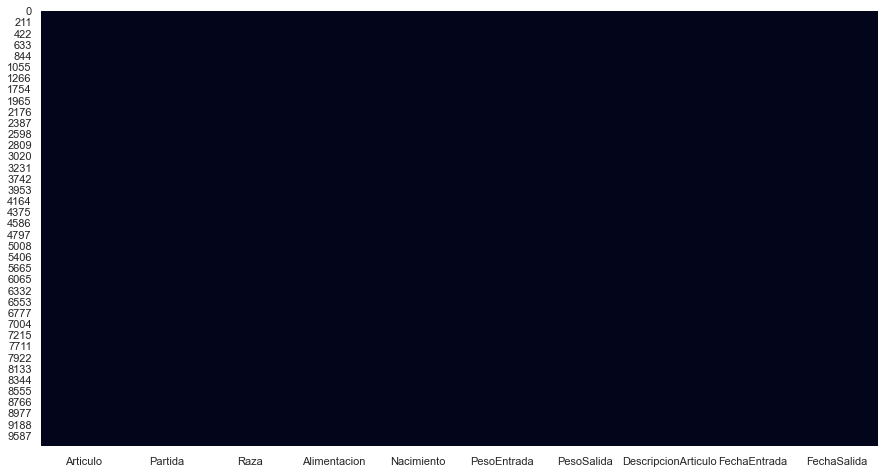

In [10]:
sns.heatmap(datos.isnull(),cbar=False)


### Reviso Duplicados

In [11]:
print(datos.duplicated().sum().sum())
dups = datos.duplicated()
# Miramos si hay duplicados
print('Algun duplicado? {}'.format(dups.any()))
print()
print('Registros duplicados: \n{}'.format(datos[dups]))
print()


13
Algun duplicado? True

Registros duplicados: 
     Articulo  Partida          Raza Alimentacion  Nacimiento  PesoEntrada  \
1053    Jamon   210247   75%_IBERICO      BELLOTA  05/11/2012        14.57   
2367    Jamon   211852   50%_IBERICO         CEBO  05/11/2012        13.51   
2405    Jamon   211067   50%_IBERICO      BELLOTA  05/11/2012        13.49   
2954    Jamon   211921   50%_IBERICO         CEBO  06/11/2013        13.16   
3015    Jamon   211921   50%_IBERICO         CEBO  06/11/2013        13.16   
3033    Jamon   211921   50%_IBERICO         CEBO  06/11/2013        13.16   
3037    Jamon   211921   50%_IBERICO         CEBO  06/11/2013        13.16   
4646    Jamon   210756  100%_IBERICO      BELLOTA  25/10/2013        12.18   
6101   Paleta   210376   75%_IBERICO      BELLOTA  08/08/2018        10.07   
7137   Paleta   211921   50%_IBERICO         CEBO  25/10/2013         8.87   
8424   Paleta   211921   50%_IBERICO         CEBO  01/11/2012         8.16   
8873   Paleta  

### Datos unicos por columna

In [12]:
counts = datos.nunique()
counts

Articulo                  2
Partida                  31
Raza                      3
Alimentacion              2
Nacimiento               27
PesoEntrada            1094
PesoSalida             1548
DescripcionArticulo       7
FechaEntrada           1826
FechaSalida             830
dtype: int64

### Corregimos Valores duplicados o iguales con distinto nombre

In [13]:
#datos['Raza'] = datos['Raza'].replace(datos[datos['Raza'].str.len()>10].index)

#datos['Raza'].replace(to_replace={'IBERICO': '50% IBERICO', 'IBERICO PURO': '100% IBERICO'}, inplace=True)
#datos['Raza'].unique()

In [14]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8213 entries, 0 to 10113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Articulo             8213 non-null   object 
 1   Partida              8213 non-null   int64  
 2   Raza                 8213 non-null   object 
 3   Alimentacion         8213 non-null   object 
 4   Nacimiento           8213 non-null   object 
 5   PesoEntrada          8213 non-null   float64
 6   PesoSalida           8213 non-null   float64
 7   DescripcionArticulo  8213 non-null   object 
 8   FechaEntrada         8213 non-null   object 
 9   FechaSalida          8213 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 705.8+ KB


# Formatos de fechas y creamos el target1: tiempo de maduración

In [15]:
datos['FechaEntrada'] =  pd.to_datetime(datos['FechaEntrada'])
datos['FechaSalida'] =  pd.to_datetime(datos['FechaSalida'])
datos['Nacimiento'] =  pd.to_datetime(datos['Nacimiento'])

### Añadimos variable Edad de sacrificio

In [16]:
# PASO 5 CREAMOS COLUMNA EdadSacrificio CON FECHAS DE NACIMIENTO Y ENTRADA DE LA PIEZA

# EdadSacrificio EN DÍAS
#datos['EdadSacrificio']= datos['FechaEntrada'] - datos['Nacimiento']
#datos['EdadSacrificio']=datos['EdadSacrificio'].dt.days.astype(int)
#datos['EdadSacrificio']



In [17]:
# EdadSacrificioMESES EN MESES
#datos["EdadSacrificio_MESES"]=round(((datos['FechaEntrada'] - datos['Nacimiento']).dt.days)/30.41).astype(int)
#datos["EdadSacrificio_MESES"]

## Target1: T_Maduracion

In [18]:
from datetime import datetime as dt

datos["T_Maduracion"]= (datos['FechaSalida']-datos['FechaEntrada'])
datos["T_Maduracion"]= datos['T_Maduracion'].dt.days.astype(int)
datos["T_Maduracion"]



0        1406
1        1452
2        1462
3        1295
4        1492
         ... 
10109     946
10110     808
10111     878
10112     852
10113     930
Name: T_Maduracion, Length: 8213, dtype: int32

In [19]:
# TiempoMaduracionMESES EN MESES
datos["T_Maduracion_MESES"]=round(((datos['FechaSalida']-datos['FechaEntrada']).dt.days)/30.41).astype(int)
datos["T_Maduracion_MESES"]

0        46
1        48
2        48
3        43
4        49
         ..
10109    31
10110    27
10111    29
10112    28
10113    31
Name: T_Maduracion_MESES, Length: 8213, dtype: int32

In [20]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8213 entries, 0 to 10113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Articulo             8213 non-null   object        
 1   Partida              8213 non-null   int64         
 2   Raza                 8213 non-null   object        
 3   Alimentacion         8213 non-null   object        
 4   Nacimiento           8213 non-null   datetime64[ns]
 5   PesoEntrada          8213 non-null   float64       
 6   PesoSalida           8213 non-null   float64       
 7   DescripcionArticulo  8213 non-null   object        
 8   FechaEntrada         8213 non-null   datetime64[ns]
 9   FechaSalida          8213 non-null   datetime64[ns]
 10  T_Maduracion         8213 non-null   int32         
 11  T_Maduracion_MESES   8213 non-null   int32         
dtypes: datetime64[ns](3), float64(2), int32(2), int64(1), object(4)
memory usage: 770.0+ KB


In [21]:
datos.describe()

,Partida,PesoEntrada,PesoSalida,T_Maduracion,T_Maduracion_MESES
count,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000
mean,210866.795203,11.609600,7.526444,1056.313771,34.744551
std,3323.863351,2.909038,1.886924,218.137963,7.173584
min,432.000000,5.830000,3.925000,256.000000,8.000000
25%,210462.000000,8.790000,5.713500,913.000000,30.000000
50%,210856.000000,12.160000,7.780500,1077.000000,35.000000
75%,211377.000000,13.540000,8.750000,1203.000000,40.000000
max,212089.000000,66.000000,42.900000,1787.000000,59.000000


In [22]:
counts = datos.nunique()
counts

Articulo                  2
Partida                  31
Raza                      3
Alimentacion              2
Nacimiento               27
PesoEntrada            1094
PesoSalida             1548
DescripcionArticulo       7
FechaEntrada           1826
FechaSalida             830
T_Maduracion           1082
T_Maduracion_MESES       49
dtype: int64

In [23]:
datos.describe()

,Partida,PesoEntrada,PesoSalida,T_Maduracion,T_Maduracion_MESES
count,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000
mean,210866.795203,11.609600,7.526444,1056.313771,34.744551
std,3323.863351,2.909038,1.886924,218.137963,7.173584
min,432.000000,5.830000,3.925000,256.000000,8.000000
25%,210462.000000,8.790000,5.713500,913.000000,30.000000
50%,210856.000000,12.160000,7.780500,1077.000000,35.000000
75%,211377.000000,13.540000,8.750000,1203.000000,40.000000
max,212089.000000,66.000000,42.900000,1787.000000,59.000000


### Primera tabla de correlaciones - para variables númericas

<AxesSubplot:>

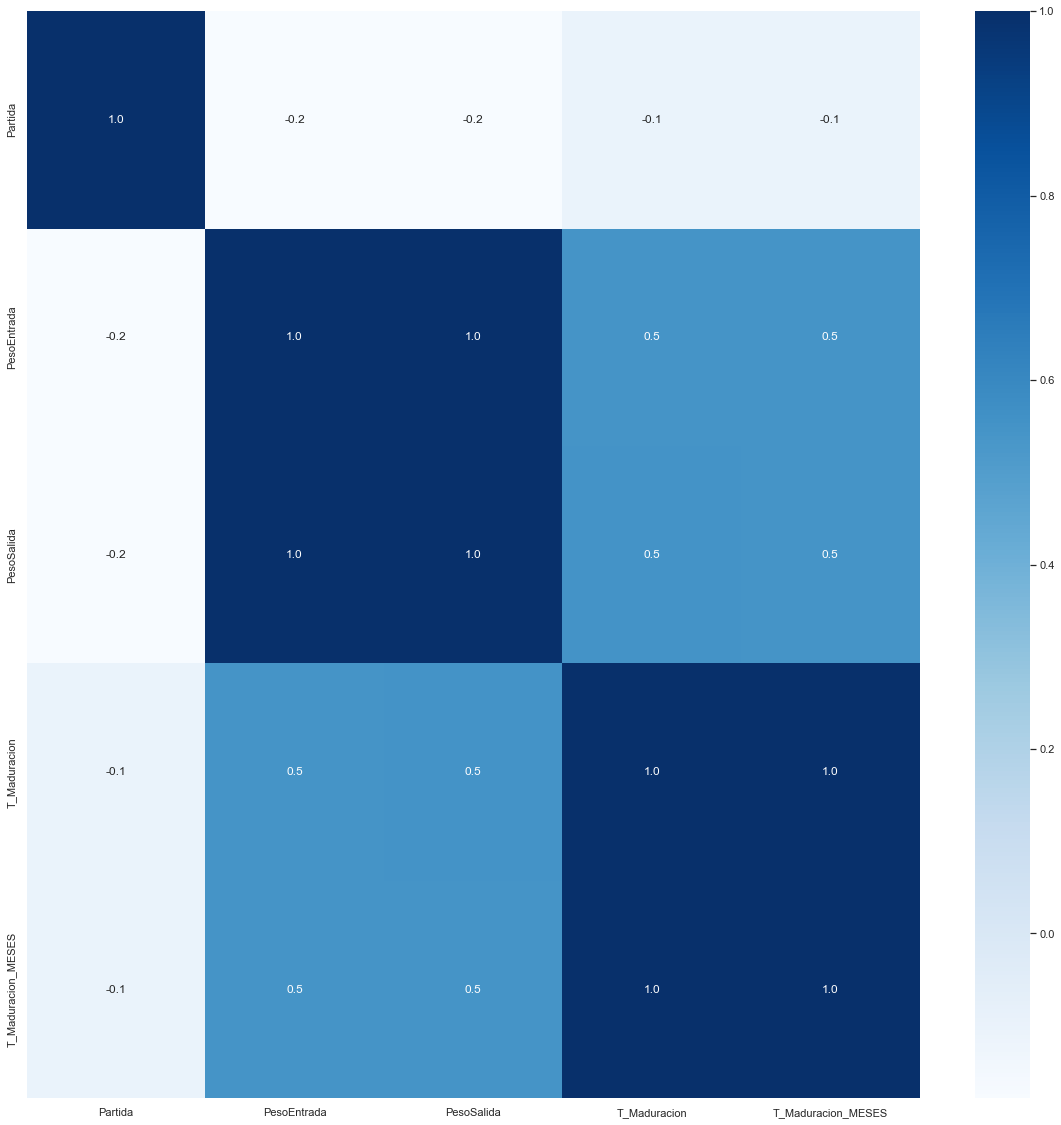

In [24]:
correlation_matrix = (datos).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')

In [25]:
datos

,Articulo,Partida,Raza,Alimentacion,Nacimiento,PesoEntrada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida,T_Maduracion,T_Maduracion_MESES
0,Paleta,1303,100%_IBERICO,BELLOTA,2012-05-11,66.000,42.90000,PALETA BELLOTA 100% IBRICA,2014-08-26,2018-07-02,1406,46
1,Jamon,210137,100%_IBERICO,BELLOTA,2013-11-15,18.995,12.34675,JAMON DE BELLOTA 100%_IBERICO,2014-07-22,2018-07-13,1452,48
2,Jamon,210137,100%_IBERICO,BELLOTA,2013-11-15,18.975,12.33375,JAMON DE BELLOTA 100%_IBERICO,2015-02-08,2019-02-09,1462,48
3,Jamon,210180,100%_IBERICO,BELLOTA,2013-11-15,18.955,12.32075,JAMON DE BELLOTA 100%_IBERICO,2015-07-25,2019-02-09,1295,43
4,Jamon,210180,100%_IBERICO,BELLOTA,2013-11-15,18.950,12.31750,JAMON DE BELLOTA 100%_IBERICO,2015-08-01,2019-09-01,1492,49
...,...,...,...,...,...,...,...,...,...,...,...,...
10109,Paleta,210949,100%_IBERICO,BELLOTA,2018-02-09,6.120,3.92500,PALETA BELLOTA 100% IBRICA,2019-05-23,2021-12-24,946,31
10110,Paleta,210856,100%_IBERICO,BELLOTA,2018-02-09,6.050,3.92500,PALETA BELLOTA 100% IBRICA,2019-10-08,2021-12-24,808,27
10111,Paleta,211291,100%_IBERICO,BELLOTA,2018-08-30,6.000,3.92500,PALETA BELLOTA 100% IBRICA,2019-07-30,2021-12-24,878,29
10112,Paleta,210793,100%_IBERICO,BELLOTA,2018-08-30,5.940,3.92500,PALETA BELLOTA 100% IBRICA,2019-08-25,2021-12-24,852,28


In [26]:
counts = datos.nunique()
counts

Articulo                  2
Partida                  31
Raza                      3
Alimentacion              2
Nacimiento               27
PesoEntrada            1094
PesoSalida             1548
DescripcionArticulo       7
FechaEntrada           1826
FechaSalida             830
T_Maduracion           1082
T_Maduracion_MESES       49
dtype: int64

### Detección de Outliers - por el momento lo dejamos aparcado

### ONE HOT ENCODER- codificación variables categóricas

In [27]:
# PASO 7 ONE_HOT_ENCODER A VARIABLES CON MENOS DE 10 CLASES

#VAMOS A HACER CREAR UN DATASET ONE_HOT_ENCODER APLICANDO EL ONE_HOT A TODAS LAS CATEGORÍAS QUE 
#TENGAN MENOS DE 11 CATEGORÍAS
'''datos_cod = datos.copy()


#Lista de número de categorías distintas del dataSet original
uvs = datos.nunique().tolist()

#Apuntaré en las siguientes dos listas los índices de las columnas de tengan menos y mas/igual de 11 categorías
ncol = []
ncolinv = []
#Con el bucle relleno ambas listas
c = 0
for i in uvs:
    if i<=10:
        ncol.append(c)
    else:
        ncolinv.append(c)
    c+=1
'''
#DataSet con variables de menos de 11 categorías
datos_codA=datos[["Raza","Alimentacion","Articulo"]]

#DataSet con variables de mas de 10 categorías
datos_codB=datos[["DescripcionArticulo","PesoEntrada","PesoSalida","FechaEntrada","FechaSalida","T_Maduracion","T_Maduracion_MESES"]]

    
#Defino el ONE_HOT_ENCODER casero que hemos fabricado para no cargarnos el dataframe
def createDummies(df, var_name):
    dummy =pd.get_dummies(df[var_name])
    df=df.drop(var_name,axis=1)
    df=pd.concat([df,dummy],axis=1)
    return(df)
    
#Debido a que esta pensado para usarse con objects o strings hago la transformación pertinente
listcol = datos_codA.columns.tolist()
datos_codA = datos_codA.astype(str)

#Aplico el ONE_HOT_ENCODER casero al dataSet de menos de 11 categorías
datos_codA = createDummies(datos_codA, listcol)

#Concateno el dataSet que tiene variables con mas de 11 categorías
datos_OneH = pd.concat([datos_codA,datos_codB], axis = 1)


datos_OneH

,Raza_100%_IBERICO,Raza_50%_IBERICO,Raza_75%_IBERICO,Alimentacion_BELLOTA,Alimentacion_CEBO,Articulo_Jamon,Articulo_Paleta,DescripcionArticulo,PesoEntrada,PesoSalida,FechaEntrada,FechaSalida,T_Maduracion,T_Maduracion_MESES
0,1,0,0,1,0,0,1,PALETA BELLOTA 100% IBRICA,66.000,42.90000,2014-08-26,2018-07-02,1406,46
1,1,0,0,1,0,1,0,JAMON DE BELLOTA 100%_IBERICO,18.995,12.34675,2014-07-22,2018-07-13,1452,48
2,1,0,0,1,0,1,0,JAMON DE BELLOTA 100%_IBERICO,18.975,12.33375,2015-02-08,2019-02-09,1462,48
3,1,0,0,1,0,1,0,JAMON DE BELLOTA 100%_IBERICO,18.955,12.32075,2015-07-25,2019-02-09,1295,43
4,1,0,0,1,0,1,0,JAMON DE BELLOTA 100%_IBERICO,18.950,12.31750,2015-08-01,2019-09-01,1492,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10109,1,0,0,1,0,0,1,PALETA BELLOTA 100% IBRICA,6.120,3.92500,2019-05-23,2021-12-24,946,31
10110,1,0,0,1,0,0,1,PALETA BELLOTA 100% IBRICA,6.050,3.92500,2019-10-08,2021-12-24,808,27
10111,1,0,0,1,0,0,1,PALETA BELLOTA 100% IBRICA,6.000,3.92500,2019-07-30,2021-12-24,878,29
10112,1,0,0,1,0,0,1,PALETA BELLOTA 100% IBRICA,5.940,3.92500,2019-08-25,2021-12-24,852,28


In [28]:
from sklearn.preprocessing import OrdinalEncoder

# PASO 9 CODIFICAMOS CON ORDINAL ENCODER
codificar = ["DescripcionArticulo"]
for columnas in codificar:
    oe = OrdinalEncoder()
    datos_OneH[columnas] = oe.fit_transform(datos_OneH[[columnas]])

In [29]:
datos_OneH

,Raza_100%_IBERICO,Raza_50%_IBERICO,Raza_75%_IBERICO,Alimentacion_BELLOTA,Alimentacion_CEBO,Articulo_Jamon,Articulo_Paleta,DescripcionArticulo,PesoEntrada,PesoSalida,FechaEntrada,FechaSalida,T_Maduracion,T_Maduracion_MESES
0,1,0,0,1,0,0,1,4.0,66.000,42.90000,2014-08-26,2018-07-02,1406,46
1,1,0,0,1,0,1,0,0.0,18.995,12.34675,2014-07-22,2018-07-13,1452,48
2,1,0,0,1,0,1,0,0.0,18.975,12.33375,2015-02-08,2019-02-09,1462,48
3,1,0,0,1,0,1,0,0.0,18.955,12.32075,2015-07-25,2019-02-09,1295,43
4,1,0,0,1,0,1,0,0.0,18.950,12.31750,2015-08-01,2019-09-01,1492,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10109,1,0,0,1,0,0,1,4.0,6.120,3.92500,2019-05-23,2021-12-24,946,31
10110,1,0,0,1,0,0,1,4.0,6.050,3.92500,2019-10-08,2021-12-24,808,27
10111,1,0,0,1,0,0,1,4.0,6.000,3.92500,2019-07-30,2021-12-24,878,29
10112,1,0,0,1,0,0,1,4.0,5.940,3.92500,2019-08-25,2021-12-24,852,28


In [30]:
counts = datos_OneH.nunique()
counts

Raza_100%_IBERICO          2
Raza_50%_IBERICO           2
Raza_75%_IBERICO           2
Alimentacion_BELLOTA       2
Alimentacion_CEBO          2
Articulo_Jamon             2
Articulo_Paleta            2
DescripcionArticulo        7
PesoEntrada             1094
PesoSalida              1548
FechaEntrada            1826
FechaSalida              830
T_Maduracion            1082
T_Maduracion_MESES        49
dtype: int64

#### Estudio de Correlaciones

In [31]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos_OneH.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

,variable_1,variable_2,r,abs_r
23,T_Maduracion_MESES,T_Maduracion,0.999194,0.999194
19,T_Maduracion,T_Maduracion_MESES,0.999194,0.999194
7,PesoEntrada,PesoSalida,0.995726,0.995726
11,PesoSalida,PesoEntrada,0.995726,0.995726
1,DescripcionArticulo,PesoEntrada,-0.745325,0.745325
5,PesoEntrada,DescripcionArticulo,-0.745325,0.745325
10,PesoSalida,DescripcionArticulo,-0.741515,0.741515
2,DescripcionArticulo,PesoSalida,-0.741515,0.741515
15,T_Maduracion,DescripcionArticulo,-0.655740,0.655740
3,DescripcionArticulo,T_Maduracion,-0.655740,0.655740


<AxesSubplot:>

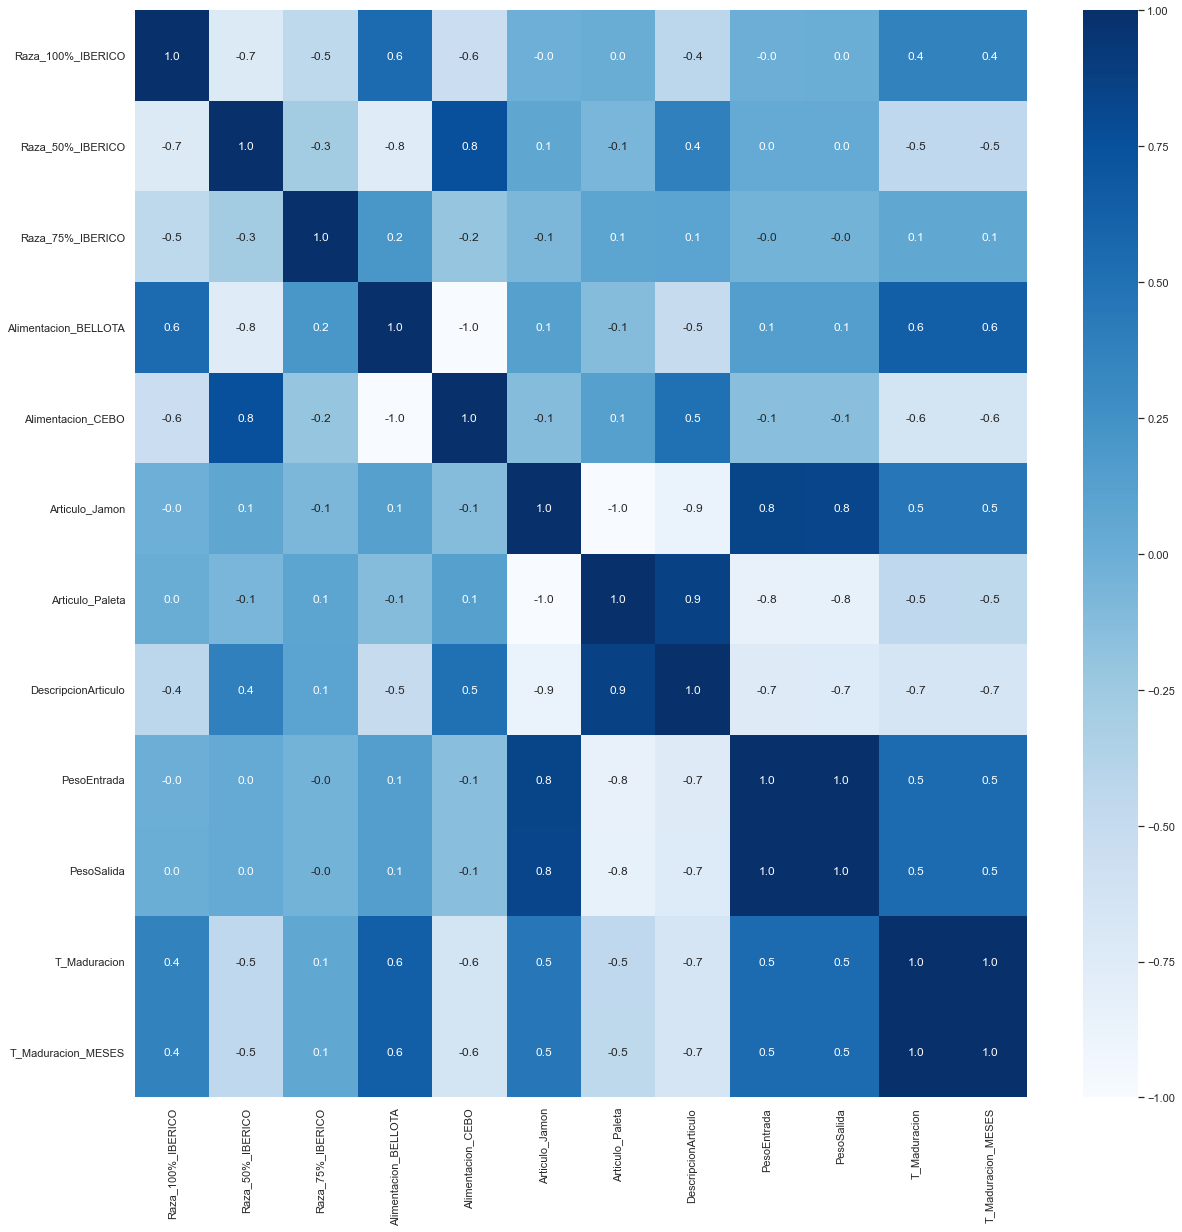

In [32]:
correlation_matrix = (datos_OneH).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')

In [33]:
datos_OneH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8213 entries, 0 to 10113
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Raza_100%_IBERICO     8213 non-null   uint8         
 1   Raza_50%_IBERICO      8213 non-null   uint8         
 2   Raza_75%_IBERICO      8213 non-null   uint8         
 3   Alimentacion_BELLOTA  8213 non-null   uint8         
 4   Alimentacion_CEBO     8213 non-null   uint8         
 5   Articulo_Jamon        8213 non-null   uint8         
 6   Articulo_Paleta       8213 non-null   uint8         
 7   DescripcionArticulo   8213 non-null   float64       
 8   PesoEntrada           8213 non-null   float64       
 9   PesoSalida            8213 non-null   float64       
 10  FechaEntrada          8213 non-null   datetime64[ns]
 11  FechaSalida           8213 non-null   datetime64[ns]
 12  T_Maduracion          8213 non-null   int32         
 13  T_Maduracion_MESE

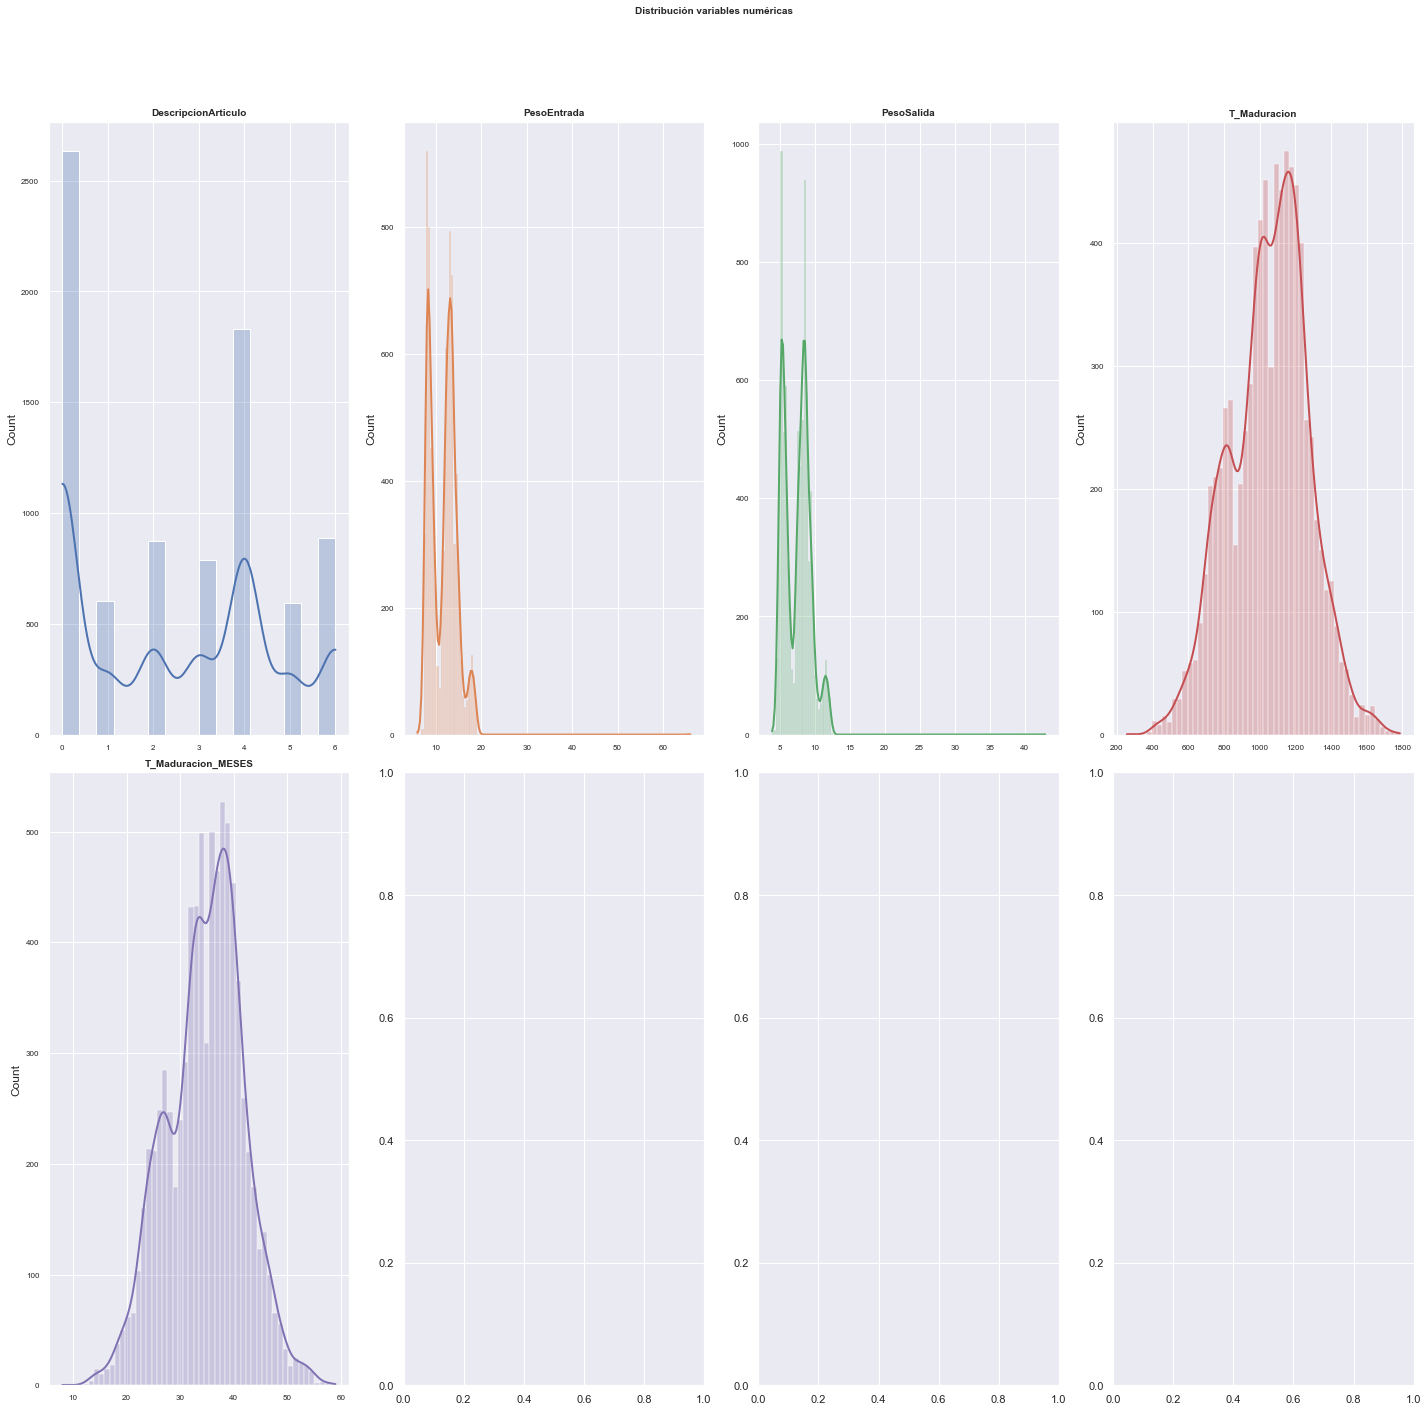

In [34]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 20))
axes = axes.flat
columnas_numeric = datos_OneH.select_dtypes(include=['float64','int64','int32']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos_OneH,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# Ajuste modelo

### División de datos en train y test

In [36]:
x = datos_OneH[['PesoEntrada','PesoSalida','Raza_100%_IBERICO','Raza_75%_IBERICO','Alimentacion_BELLOTA','Articulo_Jamon']]
y = datos_OneH['T_Maduracion_MESES']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,random_state=124,shuffle=True)

## Logistic Regresion

In [37]:
# Entrenamos el modelo
modeloLR = LogisticRegression(max_iter=200)
modeloLR.fit(x_train,y_train)

#Predecimos sobre el dataset de test
y_pred = modeloLR.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Precision: {:.3f}'.format(accuracy*100))

Precision: 13.515


## Modelo regresión

In [38]:
x_train = sm.add_constant(x_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=x_train,)
modelo = modelo.fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:     T_Maduracion_MESES   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1643.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:27:53   Log-Likelihood:                -16620.
No. Observations:                5749   AIC:                         3.325e+04
Df Residuals:                    5742   BIC:                         3.330e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.7849 

## Regresión Lineal metodo 1

In [39]:
# División de los datos en train y test
# ==============================================================================
x2 = datos_OneH[['PesoEntrada']]
#x2_train=np.array(x2)
y2 = datos_OneH['T_Maduracion_MESES']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2.values.reshape(-1,1),y2.values.reshape(-1,1),train_size = 0.8, random_state = 1234,shuffle = True)

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(x2_train.reshape(-1,1), y2_train)

LinearRegression()

In [40]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(x2.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(x2, y2))

Intercept: [19.05392904]
Coeficiente: [('PesoEntrada', 1.3526947451142979)]
Coeficiente de determinación R^2: 0.30016361721114226
